In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle

import sys
sys.path.insert(1, '../')
from utils import *

In [3]:
plt.rcParams.update({'font.size': 13})

## Functions:

In [4]:
def load_C_mean(filename):
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            C = np.array([float(i) for i in row])
    return C

In [5]:
# cosine similarity between vectors
def similarity(v1,v2):
    
    return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))

In [6]:
dataset = 'hospital'
#dataset = 'high_school'
#dataset = 'conference'
#dataset = 'workplace'

In [7]:
weighted = True

In [8]:
seed_size = 1
seed_size

1

# Comparison matrices

In [9]:
mu = 0.1
if dataset == 'hospital':
    beta_betaT_range = [(0.6,0.8),
                        (0.2,0.8),
                        (0.4,7.5),
                        (0.3,5),
                        (0.15,5),
                        (0.3,10),
                        (0.1,10),
                        (0.06,10),
                        (0.05,15),
                        (0.05,19)]
    a_inf = 0.6
    a_sup = 0.7
#elif dataset == 'high_school':
    
#elif dataset == 'conference':
    
#elif dataset == 'workplace':
    

Load all simplicial results

In [11]:
C_list_simplicial = []
for (beta,betaT) in beta_betaT_range:
    filenameL = "../Simplicial_model/code/results/inf_treeSIR_all/a_%.1f_%.1f_final/CL_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.3f.csv"%(a_inf,a_sup,dataset,beta,betaT,mu)
    filenameT = "../Simplicial_model/code/results/inf_treeSIR_all/a_%.1f_%.1f_final/CT_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.3f.csv"%(a_inf,a_sup,dataset,beta,betaT,mu)
    CL = load_C_mean(filenameL)
    CT = load_C_mean(filenameT)
    C_list_simplicial.append(CL+CT)

In [12]:
len(C_list_simplicial)

10

Load all threshold results

In [17]:
thresholds = [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]

In [18]:
C_list_thresh = []
for theta in thresholds:
    filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,theta,mu)
    C = load_C_mean(filename)
    C_list_thresh.append(C)

In [19]:
len(C_list_thresh)

10

In [20]:
filename

'../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_hospital_th_0.22_mu_0.100.csv'

Compute similarity and put in matrix sim$\\$ (each row is a different $\theta$, each column a different $\beta_|$)

In [22]:
sim = np.full((len(thresholds),len(beta_betaT_range)),0.0)
for i in range(len(thresholds)):
    for j in range(len(beta_betaT_range)):            
        sim[i,j] = similarity(C_list_thresh[i],C_list_simplicial[j])
        #print('riga',i,'col',j,'theta',thresholds[i],'beta',beta_range[j])

In [23]:
len(sim), len(sim[0])

(10, 10)

0.2816763139029196 0.4144704322093552


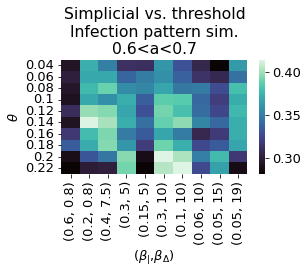

In [25]:
plot_sim_different_axes(sim, 
                        beta_betaT_range, 
                        thresholds, 
                        r'($\beta_{|}$,$\beta_{\Delta}$)', 
                        r'$\theta$',
                        'Simplicial vs. threshold\n' +'Infection pattern sim.\n'+'%.1f<a<%.1f'%(a_inf,a_sup),
                        'figs/sim_simplicial_threshold_%s_mu_%.3f_a_%.1f_%.1f.pdf'%(dataset,mu,a_inf,a_sup),
                        save=True)